0.8593073593073594
0.8508771929824561


Text(0.5,1,'Linear Classification')

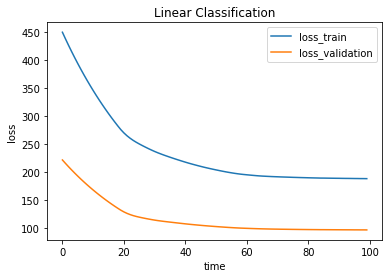

In [8]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import numpy.linalg as nl
import matplotlib.pyplot as plt
%matplotlib inline

X,Y = load_svmlight_file("australian_scale.txt")

row=X.shape[0]
B = np.mat(np.ones((X.shape[0],1)))
X=np.mat(np.c_[X.A,B])
Y=Y.reshape(len(Y),-1)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

#初始化全零
W=np.mat(np.zeros((15,1)))
learning_rate=0.03
C=1

#迭代次数
num=100
#阀值
threshold=0

loss_train=[]
loss_validation=[]

#目标函数
def score(w,x):
    return x*w

#loss函数
def loss(x,y,w,C):
    temp=0
    for i in range(len(y)):
        temp+=max(1-y[i,0]*score(w,x[i]),0)
    return 0.5*w.T.dot(w)+C*temp

#求梯度
def gradient(x,y,w):
    temp=0
    for i in range(len(x)):
        temp+=w.T
        if (1-y[i,0]*score(w,x_train[i]))>=0:
            temp=temp-(y[i]*x[i])*C
    return temp.T/x_train.shape[0]

#梯度下降
def gradient_descent(w):
    temp_w=w-learning_rate*gradient(x_train,y_train,w)
    return temp_w

#优化
def optimizer(w):
    temp_w=w
    for i in range(num):
        temp_w=gradient_descent(temp_w)
        loss_train.append(loss(x_train,y_train,temp_w,C)[0,0])
        loss_validation.append(loss(x_test,y_test,temp_w,C)[0,0])
    return  temp_w

W=optimizer(W)
# print(W)
#训练集命中率
train_hit=0
for i in range(len(x_train)):
    if (score(W,x_train[i]) >= threshold and y_train[i] == 1) or (score(W,x_train[i]) < threshold and y_train[i] == -1):
        train_hit += 1

#验证集命中率
test_hit=0
for i in range(len(x_test)):
    if (score(W,x_test[i]) >= threshold and y_test[i] == 1) or (score(W,x_test[i]) < threshold and y_test[i] == -1):
        test_hit += 1
        
print(train_hit/len(x_train))
print(test_hit/len(x_test))

n = np.arange(num)
plt.plot(n,loss_train,label='loss_train')
plt.plot(n,loss_validation,label='loss_validation')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('loss')
plt.title('Linear Classification')